In [0]:
#this guide will train a neural network in order to classifiy different objects into total 10 categories depending on their features 

In [33]:
from __future__ import absolute_import,division,print_function,unicode_literals
#Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
#helper libraries 
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

1.15.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
#60,000 images will be for training and 10,000 for testing how accurate our algorithm was
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

In [0]:
#the images are 28x28 numpy array(values ranging from 0 to 255) and while their labels are values from 0 to 9 that represents their respective categories
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
train_labels.shape

(60000,)

In [38]:
test_images.shape

(10000, 28, 28)

In [39]:
len(test_labels)

10000

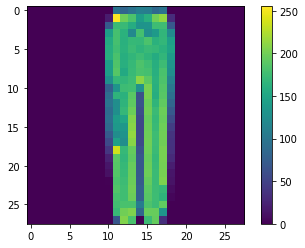

In [40]:
# Data must be preprocessed before using it to train our neural network and if we inspect the first image then we will come to know that each of the pixel values is in between 0 and 255
# and that can be a problem during optimization 
plt.figure()
plt.imshow(train_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#scaling the images between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

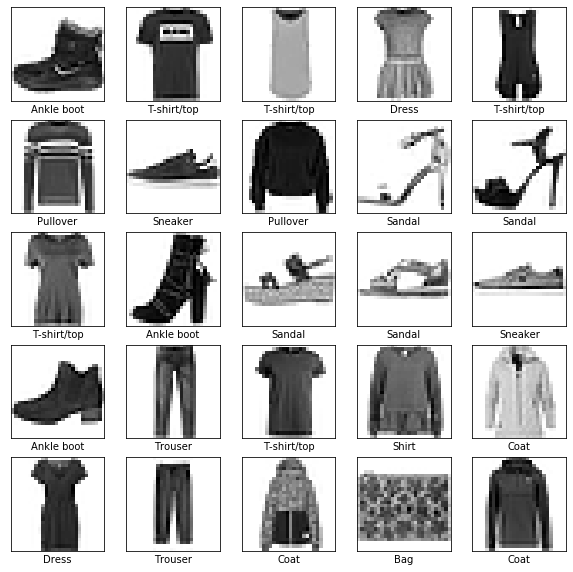

In [42]:
#to verify that the data is correct format let's see the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,1+i) #plt.subplot(no_rows,no_cols,index)
  plt.xticks([]) # to disable the ticks we have passed an empty list
  plt.yticks([]) # to disable the list we have passed an empty list
  plt.grid(False)
  plt.imshow(train_images[i],cmap = plt.cm.binary)  
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [0]:
#building a model(neural network)
model= keras.Sequential([keras.layers.Flatten(input_shape =(28,28)) , keras.layers.Dense(130,'relu') , keras.layers.Dense(10)])

In [0]:
#the first layers flattens the images pixels values from (28,28) to (784,1) and that  could be fed to the neural network 
#the second layer is having 128 hidden units and activation function used is 'relu' , while the last layer is softmax layer of 10 nodes

In [0]:
model.compile(optimizer = 'adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [46]:
model.fit(train_images,train_labels,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5018 - acc: 0.8242
Epoch 2/15
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3829 - acc: 0.8610
Epoch 3/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3385 - acc: 0.8767
Epoch 4/15
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3155 - acc: 0.8842
Epoch 5/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2976 - acc: 0.8901
Epoch 6/15
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2829 - acc: 0.8956
Epoch 7/15
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2726 - acc: 0.8992
Epoch 8/15
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2597 - acc: 0.9046
Epoch 9/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2507 - acc: 0.9071
Epoch 10/15
60000/60000 [==============================] - 

In [47]:
test_losses,test_accuracy = model.evaluate(test_images,test_labels,verbose=1)
print("\ntest accuracy : ",test_accuracy)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3447 - acc: 0.8861

test accuracy :  0.8861


In [0]:
#it turns out that accuracy on the test dataset is less that means the model has overfitten the training dataset , overfitting the model worsen the performance

In [0]:
predictions = model.predict(test_images)

In [50]:
predictions[0]

array([-15.031742 , -14.540614 , -19.112017 , -21.067022 , -11.994138 ,
        -4.8558626, -10.283721 ,   1.2400706, -15.311123 ,   5.83325  ],
      dtype=float32)

In [51]:
#prediction is the array of 10 numbers that represent the confidence value on that particular label
np.argmax(predictions[0])

9

In [52]:
#so the model is more confident that image is ankle boot 
test_labels[0]

9

In [0]:
#in order to look at the full set of 10 class predictions 
def plot_image(i,predictions_array , true_lable,img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_label:
    color = 'blue'
  else :
    color = "red"
  plt.xlabel("{} {2.0f}% ({})".format(class_names[predicted_label] , 100*np.argmax(predicted_array),class_names[true_label]) , color=color)
def plot_value_array(i,predictions_array,true_label):
  predictions_array,true_label = predictions_array , true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array,color="#7777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")